In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 8.6 MB/s 


In [6]:
import tensorflow as tf #library dasar deep learning
from tensorflow.keras.models import load_model #memanggil fungsi untuk load model yang telah disimpan saat training
import cv2 #Library untuk memanipulasi gambar dan video
import numpy as np #Library untuk manipulasi array
from mtcnn import MTCNN #Library untuk deteksi wajah
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog
import numpy as np

In [2]:
model=load_model('D:\Kuliah\Semester 8\Skripsi\MTCNN\EkspresiWajahVGG16-Final.h5')

In [ ]:
emosion_detector(model,'D:\Kuliah\Foto.jpg')

In [192]:
def load_img():
    global img, image_data, gambar
    for img_display in frame.winfo_children():
        img_display.destroy()

    image_data = filedialog.askopenfilename(initialdir="/", title="Choose an image",
                                       filetypes=(("all files", "*.*"), ("png files", "*.png")))
    basewidth = 500 # Processing image for dysplaying
    img = Image.open(image_data)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    file_name = image_data.split('/')
    panel = tk.Label(frame, text= str(file_name[len(file_name)-1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()

    gambar = (str(image_data))
    print (gambar)
    return gambar



In [186]:
def emosion_detector():


    for img_display in frame.winfo_children():
        img_display.destroy()
    
    print(gambar)

    model=load_model('D:\Kuliah\Semester 8\Skripsi\MTCNN\EkspresiWajahVGG16-Final.h5')

    class_label=['Marah','Jijik','Takut','Bahagia','Sedih','Terkejut','Netral'] #Mendefinisikan list nama kategori emosi
    face_detector = MTCNN() #Load model pendeteksi wajah (MTCNN)

    imge = plt.imread(gambar) #Load gambar
    gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY) #Ubah gambar ke grayscale
    faces = face_detector.detect_faces(imge) #Deteksi wajah-wajah yang ada di gambar

    for i in range(len(faces)):
        x, y, w, h = faces[i]['box'] #Ambil koordinat area wajah yang terdeteksi
        cv2.rectangle(imge, (x, y), (x+w, y+h), (3, 115, 252), 4) #Buat persegi panjang yang sesuai dengan koordinat area wajah 
        crop = cv2.resize(imge[y:y+h,x:x+w],(48,48)) #Potong gambar sesuai dengan area wajah dan mengubah ukuran ke 48x48
        crop = crop/255.0 #Scaling gambar
        crop = crop.reshape(-1,48,48,3) #Ubah ukuran array gambar

        result = model.predict(crop) #Prediksi emosi wajah
        label_idx=np.where(result[0]==max(result[0]))[0][0] #Mencari indeks label yang probabilitas hasil prediksinya paling besar

        text = class_label[label_idx] #Mengambil nama kategori dengan probabilitas hasil prediksinya paling besar
        font = cv2.FONT_HERSHEY_SIMPLEX #Set font teks
        font_scale = 0.8 #Set ukuran font
        font_color = (255, 255, 255) #Set warna font 
        font_thickness = 2 #Set ketebalan font
        text_color_bg = (3, 115, 252) #Set warna latar belakang text

        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness) #Mengambil ukuran teks di gambar
        text_w, text_h = text_size #Mengambil lebar dan panjang teks
        cv2.rectangle(imge, (x + text_w, y - text_h-15), (x, y), text_color_bg, -1) #Membuat persegi panjang yang sesuai dengan ukuran teks
        cv2.putText(imge,text,(x, y-10), font , font_scale, font_color, font_thickness) #Memasukkan teks ke gambar
    fig,ax=plt.subplots(figsize=(imge.shape[0]/72,imge.shape[1]/72)) #Plot gambar dengan ukuran sesuai dengan aslinya
    ax.imshow(imge)
    plt.axis('off') #Hapus sumbu gambar
    plt.savefig('D:\Kuliah\hasil.png')

    basewidth = 600
    img = Image.open('D:\Kuliah\hasil.png')
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    file_name = image_data.split('/')
    panel = tk.Label(frame, text= str(file_name[len(file_name)-1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()


In [193]:
root = tk.Tk()
root.title('Face Expression Recognition')
root.resizable(False, False)
tit = tk.Label(root, text="Face Expression Recognition", padx=25, pady=6, font=("", 12)).pack()
canvas = tk.Canvas(root, height=600, width=1000, bg='grey')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
chose_image = tk.Button(root, text='Pilih Gambar',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=load_img)
chose_image.pack(side=tk.LEFT)
class_image = tk.Button(root, text='Deteksi Ekspresi',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=emosion_detector)
class_image.pack(side=tk.RIGHT)

C:\Users\enric\AppData\Local\Temp\ipykernel_12816\2212071457.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


D:/Kuliah/Semester 8/gettyimages-143110953-612x612.jpg
D:/Kuliah/Semester 8/gettyimages-143110953-612x612.jpg
1/1 [==============================] - 0s 39ms/step


C:\Users\enric\AppData\Local\Temp\ipykernel_12816\906657188.py:48: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


D:/Kuliah/Semester 8/maxresdefault (1).jpg
D:/Kuliah/Semester 8/maxresdefault (1).jpg
1/1 [==============================] - 0s 44ms/step
D:/Kuliah/Semester 8/spiderman.jpg
D:/Kuliah/Semester 8/spiderman.jpg
1/1 [==============================] - 0s 35ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\enric\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py", line 3096, in open
    fp.seek(0)
AttributeError: 'str' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\enric\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\enric\AppData\Local\Temp\ipykernel_12816\2212071457.py", line 9, in load_img
    img = Image.open(image_data)
  File "c:\Users\enric\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py", line 3098, in open
    fp = io.BytesIO(fp.read())
AttributeError: 'str' object has no attribute 'read'


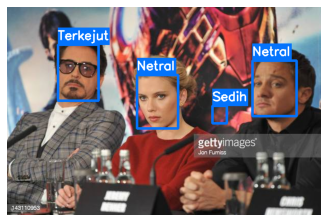

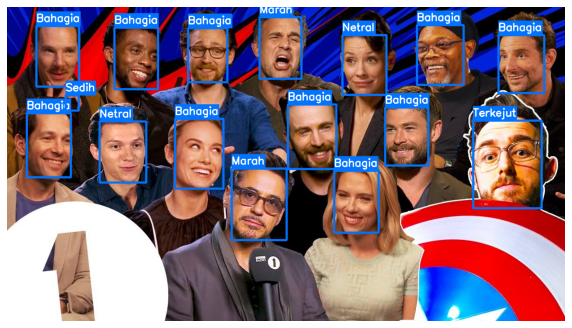

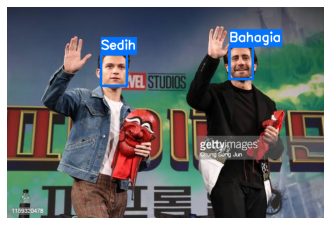

In [194]:
root.mainloop()